In [1]:
import matplotlib.pyplot as plt
import numpy as np

　另外，要在Jupyter Notebook中内嵌显示图（将其嵌入到原始HTML中），需要执行以下magic命令（新版似乎不需要）。


In [2]:
%matplotlib inline

描画折线图和散点图
---------------------------

<br>

　　先从折线图和散点图开始，折线图使用plt.plot，散点图使用plt.scatter。

　　两者都采用两个数字序列[x1，x2，……，xn]，[y1y2，……，yn]作为输入和n个点（x1，y1），（x2，y2），……为，（xn，yn）描画折线图或散点图。


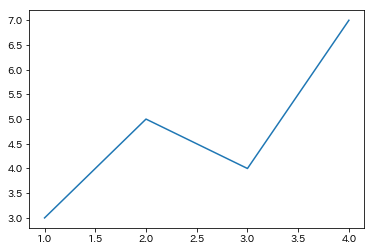

In [3]:
x=np.array([1,2,3,4])
y=np.array([3,5,4,7])
plt.plot(x,y)

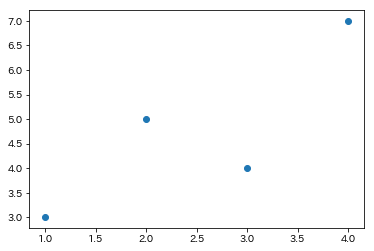

In [4]:
plt.scatter(x,y)

　　使用Jupyter Notebook声明了“％matplotlib inline，当调用plt.plot或plt.scatter时，会自动显示图形，而在Python程序中，除非在运行plt.plot或plt.scatter之后显式调用plt.show()，否则不会显示图形。

　　上面，使用了相同的数据描画线图和散点图。 x和y也可以是列表而不是数组，为了与下面的说明一致，使用数组。<br>
  

并列显示图形：subplots
--------------------------------------

<br>
　使用subplots

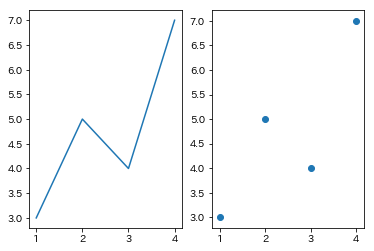

In [5]:
fig,axes = plt.subplots(1,2)
axes[0].plot(x,y)
axes[1].scatter(x,y)


　subplots的第一个参数是行数（垂直排列个数），第二个参数是列数（水平排列个数），可以垂直和水平排列多个。以此方式排列的每个图框有时称为面板。


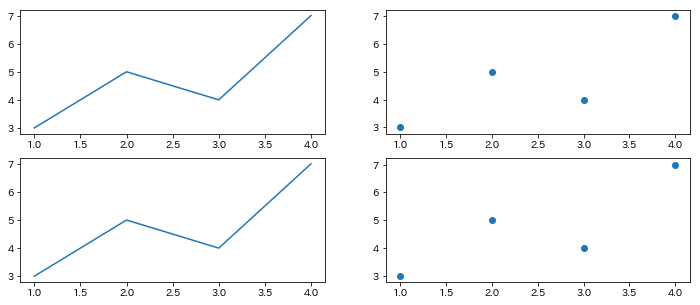

In [6]:
fig,axes = plt.subplots(2,2,figsize=(12,5))
axes[0,0].plot(x,y)
axes[1,0].plot(x,y)
axes[0,1].scatter(x,y)
axes[1,1].scatter(x,y)

每个面板的大小通过参数figsize指定。二维数组axes[i,j]指定面板。

描画曲线
----------------------

<br>
　描画sin和cos的图形，通过「np.linspace(-5,5,300)」指定范围和划分间隔。

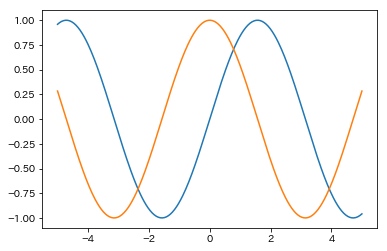

In [7]:
x = np.linspace(-5,5,300)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)

　在一个面板上画了两个图。两次调用plt.plot，它将自动描画不同的颜色。此处，np.linspace（-5,5,300）是指通过平均划分以下范围来获得300点。

　首先，用plt.subplots制作一个面板，并将其放在ax1中。条形图由ax1.bar绘制。然后，指定y的范围和x的小数位数，需要小心，与没有子图的情况相比，方法名是不同的。在这里，set_ylim和set_xticks用作ax1方法，但是当不使用子图时使用plt.ylim和plt.xticks。

　使用xtwin方法创建共享x轴的不同图形。在此，与ax1共享x轴的区域由ax1twinx（）创建并存储在ax2中。通过ax2.ylim，分别指定ax2的y轴刻度和ax1。此处指定的内容将显示在图形的右轴上。然后用plot绘制线形图。


### 使用Fill_between方法填充

　使用plt.fill_between。在曲线之间填充描画。


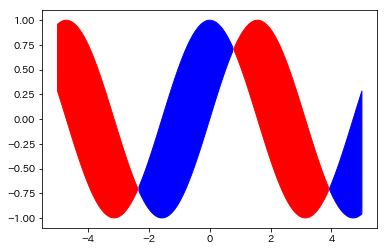

In [8]:
plt.fill_between(x,y1,y2,where=y1>=y2,color="r")
plt.fill_between(x,y1,y2,where=y1<y2,color="b")

　命名参数where表示plt.fill_between的填充条件。y1和y2都包含一维数组，y1>=y2触发广播机制。也就是说，根据y1和y2在每个点上哪个更大，它变成一个True/False数组。


  　　　　　　　 $ - 5\leq x \leq 5$ 

### 命名参数color填充颜色

　命名参数color设定填充颜色。在颜色名称中，r表示红色，b表示蓝色。像这样经常使用的颜色可以用一个字母指定。可以用一个字符指定的颜色如下：

 - r：红色
 - g：绿色
 - b：蓝色
 - c：青色
 - m：洋红色
 - y：黄色
 - k：黑色
 - w：白色
 
　除了这些以外，还可以指定如「#808080」之类的RGB字符串，还可以通过上述单个字符规范以外的名称来指定诸如darkgreen、skyblue的名称。有关可用于指定颜色的字符串，参见Matplotlib文档。
 
 ![mat](img/news015_14.jpg)


更改图形修饰
---------------------------


　更改图形的修饰

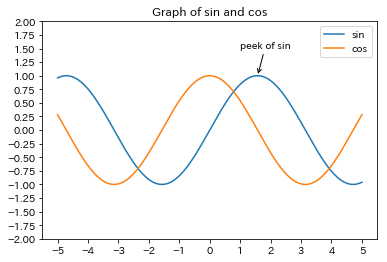

In [9]:
plt.plot(x,y1,label="sin")
plt.plot(x,y2,label="cos")
plt.title("Graph of sin and cos")
plt.ylim(-2,2)
plt.xticks(np.arange(-5,5.01,1))
plt.yticks(np.arange(-2,2.01,0.25))
plt.annotate("peek of sin",xy=(np.pi/2,1),xytext=(1,1.5), arrowprops={"arrowstyle":"->"})
plt.legend()



### 显示凡例

　在plt.plot中增加参数label。该标签指定字符串在右上方显示凡例，可以指定每个图形显示的内容。当在plt.plot的参数中指定了label时，凡例将不会显示在右上角，可通过调用plt.legend显示凡例。

### 设置标题

　在plt.title中设置标题。标题显示在图形上方。可以在标题中添加日语，但是在这种情况下，必须指定字体文件，并且该字体文件取决于操作系统，在此省略。


### 设定y轴范围

　在plt.ylim中指定y的范围。

　 $ -2\leq y \leq 2$ 
  
　与ylim类似，可以使用xlim设置x范围，如果未设置，它将根据数据自动设置。x轴上的比例尺和附在y轴上的比例尺分别由 plt.xticks和plt.yticks指定。

### 设定文本注释

在「plt.annotate」中，通过文本指定注释。「peek of sin」是将显示的字符串。命名参数xy指示箭头指向的位置「xytext」指示文本的显示位置。 「arrowpros」字典形定义箭头特征。 箭头的形状由「{“arrowstyle”:”->”}」指定。

<br>



同时描画条形图和折线图
-----------------------------------

<br>

　同时显示条形图和折线图。在此绘制的是经常在学校地理课程中出现的降雨图（降雨和温度图表）。该数据使用了2016年东京的天气信息。通过从JMA网站上的过去天气数据的页面下载获得，由于没有标准格式，数据在程序中进行处理。


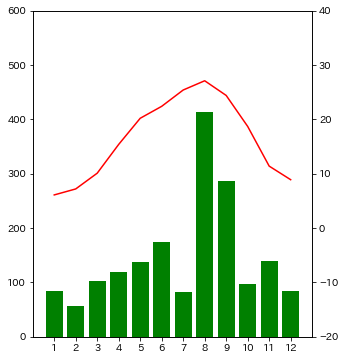

In [10]:
fig,ax1 = plt.subplots(figsize=(5,6))
width = 0.8
x = np.arange(1,13)
precipitation = np.array([85, 57, 103, 120, 137.5, 174.5, 81.5, 414, 287, 96.5, 139, 84])
temperature = np.array([6.1, 7.2, 10.1, 15.4, 20.2, 22.4, 25.4, 27.1, 24.4, 18.7, 11.4, 8.9])
ax1.bar(x, precipitation, width, color="g")
ax1.set_ylim(0,600)
ax1.set_xticks(x)
ax2 = ax1.twinx()
ax2.set_ylim(-20,40)
ax2.plot(x,temperature, color="r")

　　用plt.subplots制作一个面板，并将其放入「ax1」。由「ax1.bar」描画条形图。指定y的范围和x的小数位数，使用subplots时，ax1方法使用set_ylim和set_xticks，不使用subplots时使用plt.ylim和plt.xticks。 使用xtwin创建共有x轴的不同图形。通过「ax1twinx()，作成ax1与x轴的共有区域并存入ax2。通过ax2.ylim，指定ax2的y轴刻度。指定的内容将显示在图形的右轴上。通过plot绘制线形图。


In [ ]:
### 描画直方图

　绘制直方图。利用执行正态分布的随机数并将其绘制为直方图。

(array([ 5.,  2.,  7.,  7., 21., 24., 35., 45., 53., 55., 47., 52., 42.,
        38., 22., 14., 12., 10.,  8.,  1.]),
 array([-2.77259276, -2.49915192, -2.22571108, -1.95227024, -1.67882939,
        -1.40538855, -1.13194771, -0.85850687, -0.58506603, -0.31162519,
        -0.03818435,  0.23525649,  0.50869733,  0.78213817,  1.05557901,
         1.32901985,  1.60246069,  1.87590153,  2.14934237,  2.42278321,
         2.69622405]),
 <a list of 20 Patch objects>)

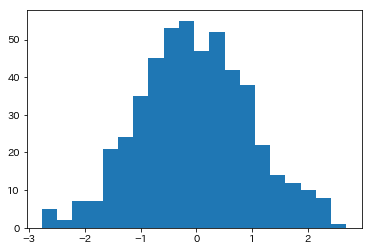

In [11]:
np.random.seed(0)
x = np.random.randn(500)
plt.hist(x, bins=20)

　生成500个随机数，将其放在x中，并使用plt.hist」绘制直方图。 plt.hist的参数bins表示区域数。分为20个间隔，直方图是通过计算每个间隔中包含多少数据而获得的。

### 函数的等高线
<br>

　　下面是一段编写函数等高线的代码。也可以用于机器学习中以不同颜色显示分类结果。此处描画的是混合高斯分布等高线。



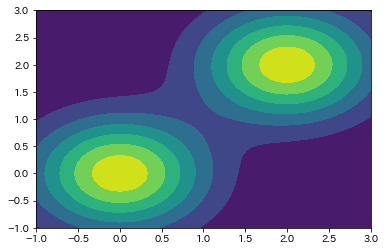

In [12]:
def f(x,y):
     return np.exp(-(x**2+y**2))+np.exp(-((x-2)**2+(y-2)**2))
x = np.linspace(-1,3,200)
y = np.linspace(-1,3,200)
X,Y = np.meshgrid(x,y)
Z = f(X.ravel(),Y.ravel()).reshape(X.shape)
plt.contourf(X,Y,Z)


　「f(x,y)」是高斯混合分布的常数倍（积分为1，未归一化）。

　　显示等高线，需将xy平面细分为一个网格并评估网格上每个点的函数值。 网格各点的x和y坐标将分别在X和Y中作为二维数组，利用「X, Y = np.meshgrid(x,y)」计算。

　　接下来，评估网格点的函数值。二维数组使用不便，使用「.ravel()」转化为一维后代入。f中广播有效，并同时计算函数值。将该结果二维化转化为网格相同形状称为「.reshape(X.shape)」。得到了描画所需的全部数据后，使用plt.contourf(X,Y,Z描画等高线。
<br>


官方网站文档与gallery
--------------------------------

<br>
　　在此，只是介绍了Matplotlib的基本用法。 Matplotlib还有许多功能，如果需要，可以参考官方网站文档。

尤其是在图库中，有许多使用示例，建议浏览一下，有很多可以参考的源代码。
